In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


2016 average fuel economy is 24.7 mpg
https://www.reuters.com/article/us-autos-emissions/u-s-vehicle-fuel-economy-rises-to-record-24-7-mpg-epa-idUSKBN1F02BX
downloaded 14 Dec 2018

In [5]:
mpg2016=24.7

In [6]:
weight=data["weight"]
mpg=data["mpg"]

In [7]:
#X=np.array(data[["displ","hp"]])
#Y=np.array(data["mpg"])
#y=Y.reshape(-1,1)
#n=len(Y)
#print(n)

In [8]:
gas_guzzler=[1 if z<mpg2016 else 0 for z in mpg]

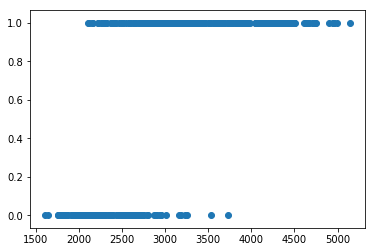

In [7]:
plt.scatter(weight,gas_guzzler)

In [9]:
X=np.array(weight).reshape(-1,1)
y=np.array(gas_guzzler)

In [9]:
from sklearn.linear_model import LogisticRegression as LR

In [10]:
r=LR().fit(X,y)

In [60]:
b=r.coef_[0,0]
a=r.intercept_[0]
x0=-a/b
print("a (intercept)=",a)
print("b (slope)=",b)
print("x0 (50% point)=",x0)

a (intercept)= -4.847731365621908
b (slope)= 0.001869482929460507
x0 (50% point)= 2593.086724263837


In [13]:
xvals=np.linspace(1500,5500,100)
def flogistic(x,a,b):
    return 1/(1+np.exp(-(a+b*x)))
yvals=flogistic(xvals,a,b)


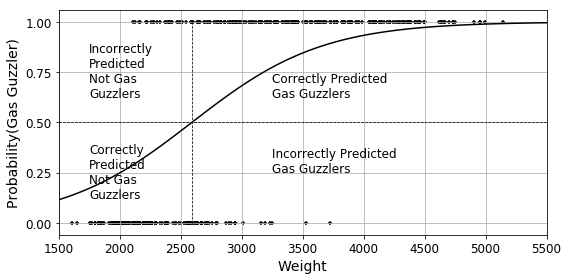

In [57]:
plt.plot(xvals,yvals, c="k")
plt.scatter(weight,gas_guzzler,s=15,c="k",marker="+")
plt.plot([1000,5500], [.5,.5],c="k",ls="--",lw=.75)
plt.plot([x0,x0],[0,1],c="k",ls="--",lw=.75)
plt.xlim([1500,5500])
plt.yticks([0,.25, .5, .75, 1])
plt.grid()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
plt.xlabel("Weight", fontsize=14)
plt.ylabel("Probability(Gas Guzzler)", fontsize=14);
plt.text(3250,.625,"Correctly Predicted\nGas Guzzlers", fontsize=12);
plt.text(3250,.25,"Incorrectly Predicted\nGas Guzzlers",fontsize=12)
plt.text(1750,.625,"Incorrectly\nPredicted\nNot Gas\nGuzzlers",
         fontsize=12);
plt.text(1750,.125,
         "Correctly\nPredicted\nNot Gas\nGuzzlers",fontsize=12);
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig("figure-logistic-onevar-gasguzzler-probability.pdf")

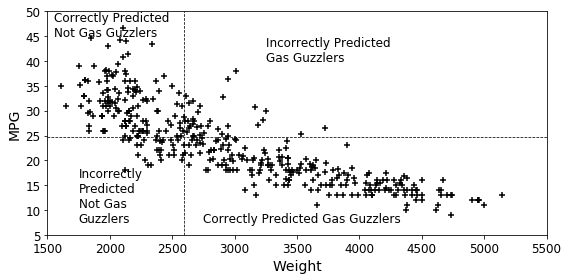

In [58]:
plt.scatter(weight,mpg,marker="+",c="k")
plt.plot([1500,5500],[mpg2016,mpg2016], c="k",ls="--",lw=.75)
plt.plot([x0,x0],[5,50],c="k",ls="--",lw=.75)
plt.xlim([1500,5500]);
plt.ylim([5,50]);
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
plt.xlabel("Weight", fontsize=14)
plt.ylabel("MPG", fontsize=14);
plt.text(2750,7.5,"Correctly Predicted Gas Guzzlers", fontsize=12);
plt.text(3250,40,"Incorrectly Predicted\nGas Guzzlers",fontsize=12)
plt.text(1750,7.5,"Incorrectly\nPredicted\nNot Gas\nGuzzlers",fontsize=12);
plt.text(1550,45,"Correctly Predicted\nNot Gas Guzzlers",fontsize=12);
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig("figure-logistic-onevar-gasguzzler-mpg-vs-weight-confusion.pdf")

In [68]:
xdata=data[["displ","hp","weight","accel"]]
xdata[:5]
X2=np.array(xdata)

In [69]:
r2=LR().fit(X2, y)

In [70]:
b=r2.coef_#[0,0]
a=r2.intercept_#[0]
#x0=-a/b
print("a (intercept)=",a)
print("b (slope)=",b)
#print("x0 (50% point)=",x0)

a (intercept)= [-0.20819552]
b (slope)= [[ 0.01457418 -0.01558174  0.00213798 -0.38627897]]


In [75]:
r2p=r2.predict(X2)

In [77]:
rp=r.predict(X)

In [87]:
sum(y==rp)/len(y)

0.8367346938775511

In [88]:
sum(y==r2p)/len(y)

0.8341836734693877

In [89]:
from sklearn.metrics import confusion_matrix

In [94]:
cm1=confusion_matrix(y,rp)
cm1

array([[131,  35],
       [ 29, 197]])

In [95]:
cm2=confusion_matrix(y,r2p)
cm2

array([[139,  27],
       [ 38, 188]])

In [129]:
pX=r.predict_proba(X)[:,1]
pX2=r2.predict_proba(X2)[:,1]

In [116]:
from sklearn.metrics import roc_curve

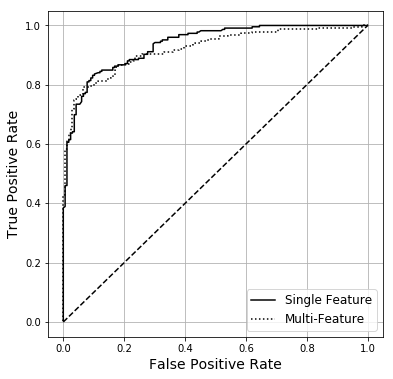

In [138]:
fpr, tpr, threshold = roc_curve(y, pX)
fpr2, tpr2, threshold2=roc_curve(y,pX2)
plt.plot(fpr,tpr,c="k",label="Single Feature")
plt.plot(fpr2,tpr2,c="k",ls=":",label="Multi-Feature")
plt.plot([0,1],[0,1],c="k",ls="--")
plt.legend(fontsize=12)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(6,6)
#fig.savefig("ROC-curve-gas-guzzler-logistic.pdf")

## Repeat with a train-test split

In [40]:
import random
random.seed(99)
def train_test_split(x,y,f=.75):
    # Force between 10 and 90 percent training data
    f=max(.1, min(f,.9))
    # shuffle the indices of the original data
    n=len(x)
    ntrain=round(f*n)
    indices=list(range(n))
    random.shuffle(indices)
    ind_train=indices[:ntrain]
    ind_test=indices[ntrain:]
    XTRAIN=x[ind_train]; YTRAIN=y[ind_train]
    XTEST=x[ind_test]; YTEST=y[ind_test]
    return(XTRAIN,YTRAIN,XTEST,YTEST)


In [52]:
X=np.array(weight)
Y=np.array([1 if z<mpg2016 else 0 for z in mpg])
XTRAIN,YTRAIN, XTEST, YTEST=train_test_split(X,Y,f=.5)
XTRAIN=XTRAIN.reshape(-1,1)
XTEST=XTEST.reshape(-1,1)

In [56]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [63]:
r=LR().fit(XTRAIN,YTRAIN)
b=r.coef_[0,0]
a=r.intercept_[0]
x0=-a/b
print("a (intercept)=",a)
print("b (slope)=",b)
print("x0 (50% point)=",x0)

a (intercept)= -4.2520217925855945
b (slope)= 0.001659205737367726
x0 (50% point)= 2562.685082882659


In [55]:
YP=r.predict(XTEST)
confusion_matrix(YTEST,YP)

array([[64, 20],
       [15, 97]])

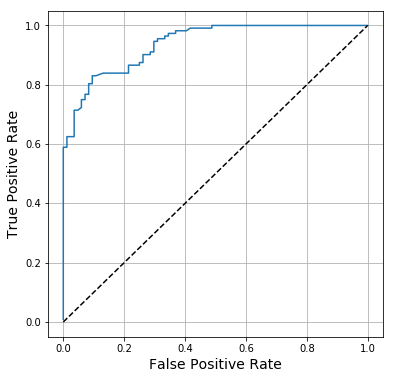

In [62]:
probs=r.predict_proba(XTEST)[:,1]
fpr, tpr, threshold = roc_curve(YTEST,probs)
plt.plot(fpr,tpr, c="k")
plt.plot([0,1],[0,1],c="k",ls="--")

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.savefig("ROC-curve-gas-guzzler-logistic.pdf")

In [68]:
print("accuracy=",sum(YP==YTEST)/len(YTEST))

accuracy= 0.8214285714285714


In [77]:
# multifactorial with train/test split
X2=np.array(data[["displ","hp","weight","accel"]])
XTRAIN,YTRAIN, XTEST, YTEST=train_test_split(X2,Y,f=.5)
r2=LR().fit(X2, Y)
b=r2.coef_
a=r2.intercept_
print("a (intercept)=",a)
print("b (slope)=",b)
YP=r2.predict(XTEST)
print("accuracy=",sum(YP==YTEST)/len(YTEST))

a (intercept)= [-0.20819552]
b (slope)= [[ 0.01457418 -0.01558174  0.00213798 -0.38627897]]
accuracy= 0.8520408163265306
